In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


In [2]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa
from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df, find_most_frequent_and_calculate_mismatches, get_i_th_kmers, select_best_kmers, count_seq_coverage, find_best_pair_kmer, calculate_kmer_coverage, find_kmer_position
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe, combine_fasta_files
from vicon.visualization.plots import plot_rel_cons
from vicon.io.fasta import create_folders_and_save_sequences, read_fasta, remove_first_record, read_fasta_to_dataframe
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import shutil

In [3]:

import os

# Get the base path from the environment variable
base_path = os.getenv("PROJECTS_PATH")
base_path = f"{base_path}vicon/"
print(base_path)


/fast/AG_Ohler/ekarimi/projects/vicon/


In [4]:


VIRUS = "rsva_algo1"
INPUT_SAMPLE = f"{base_path}data/rsva/samples/RSVA_1973-2023-10.fasta"
INPUT_REFERENCE = f"{base_path}data/rsva/reference/EPI_ISL_412866_RSVA_ref.fasta"

VIRALMSA_PATH = os.path.join(f"{base_path}scripts/ViralMSA.py")
OUTPUT_DIR = os.path.join(f"{base_path}results", VIRUS)

# Parameters for Tools
EMAIL = "email@address.com"
KMER_SIZE = 150
THRESHOLD = 147
L_GENE_START = 8000
L_GENE_END = 16000

SAMPLE_DIR = os.path.dirname(INPUT_SAMPLE)
REFERENCE_DIR = os.path.dirname(INPUT_REFERENCE)

LOG_DIR = os.path.join(OUTPUT_DIR, "logs")
MAIN_DF_PATH = os.path.join(OUTPUT_DIR, "aggregated_results.csv")
KMER1_PATH = os.path.join(OUTPUT_DIR, "kmer1.csv")
KMER2_PATH = os.path.join(OUTPUT_DIR, "kmer2.csv")

# File Names
SAMPLE_NAME = os.path.basename(INPUT_SAMPLE)
REFERENCE_NAME = os.path.basename(INPUT_REFERENCE)

# Paths
DEREP_FASTA = os.path.join(SAMPLE_DIR, "derep.fasta")
CLUSTERS_UC = os.path.join(SAMPLE_DIR, "clusters.uc")
ALIGNED_DIR = os.path.join(SAMPLE_DIR, "aligned")
if os.path.exists(ALIGNED_DIR):
    shutil.rmtree(ALIGNED_DIR)
DEREP_FASTA_ALN = os.path.join(ALIGNED_DIR, "derep.fasta.aln")


In [5]:



# Example Usage of Paths and Functions
run_vsearch(INPUT_SAMPLE, DEREP_FASTA, CLUSTERS_UC)
run_viralmsa(
    email=EMAIL, 
    sample_fasta=DEREP_FASTA, 
    output_dir=ALIGNED_DIR, 
    reference_fasta=INPUT_REFERENCE, 
    script_path=VIRALMSA_PATH
)

remove_first_record(DEREP_FASTA_ALN, DEREP_FASTA_ALN)

# Process all samples and aggregate results
# df, mask = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=THRESHOLD, only_valid_kmers=True)
df3, mask3 = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=KMER_SIZE-3, only_valid_kmers=True)

# Save aggregated results
# df.to_csv(MAIN_DF_PATH)
# print("Aggregated results saved.")

# df = pd.read_csv(MAIN_DF_PATH, index_col="SampleID")
df3


vsearch v2.29.1_linux_x86_64, 1007.7GB RAM, 112 cores
https://github.com/torognes/vsearch

Dereplicating file /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/RSVA_1973-2023-10.fasta 100%
66813743 nt in 4407 seqs, min 14900, max 15526, avg 15161
Sorting 100%
4082 unique sequences, avg cluster 1.1, median 1, max 12
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
The first record has been removed. Updated FASTA saved to: /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/aligned/derep.fasta.aln


,0,1,2,3,4,5,6,7,8,9,...,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075
SampleID,,,,,,,,,,,,,,,,,,,,,
hRSV/A/USA/LA2-03/2013|EPI_ISL_2579900|2013-01-03;size=12,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
hRSV/A/USA/SC0460/2019|EPI_ISL_2585292|2019;size=7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV/A/India/A-NIV1114046-11/2011|EPI_ISL_2579857|2011;size=6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
hRSV/A/New_Zealand/IESR-VR0530/2021|EPI_ISL_16959639|2021-06-15;size=5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
hRSV/A/Argentina/PAIS-ELZ-15/2022|EPI_ISL_17951002|2022-06-24;size=4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hRSV/a/Slovakia/1342/2023|EPI_ISL_17481635|2023-02-07;size=1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
hRSV/a/Slovakia/1532/2023|EPI_ISL_17481643|2023-02-13;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV/a/Slovakia/1533/2023|EPI_ISL_17481644|2023-02-08;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


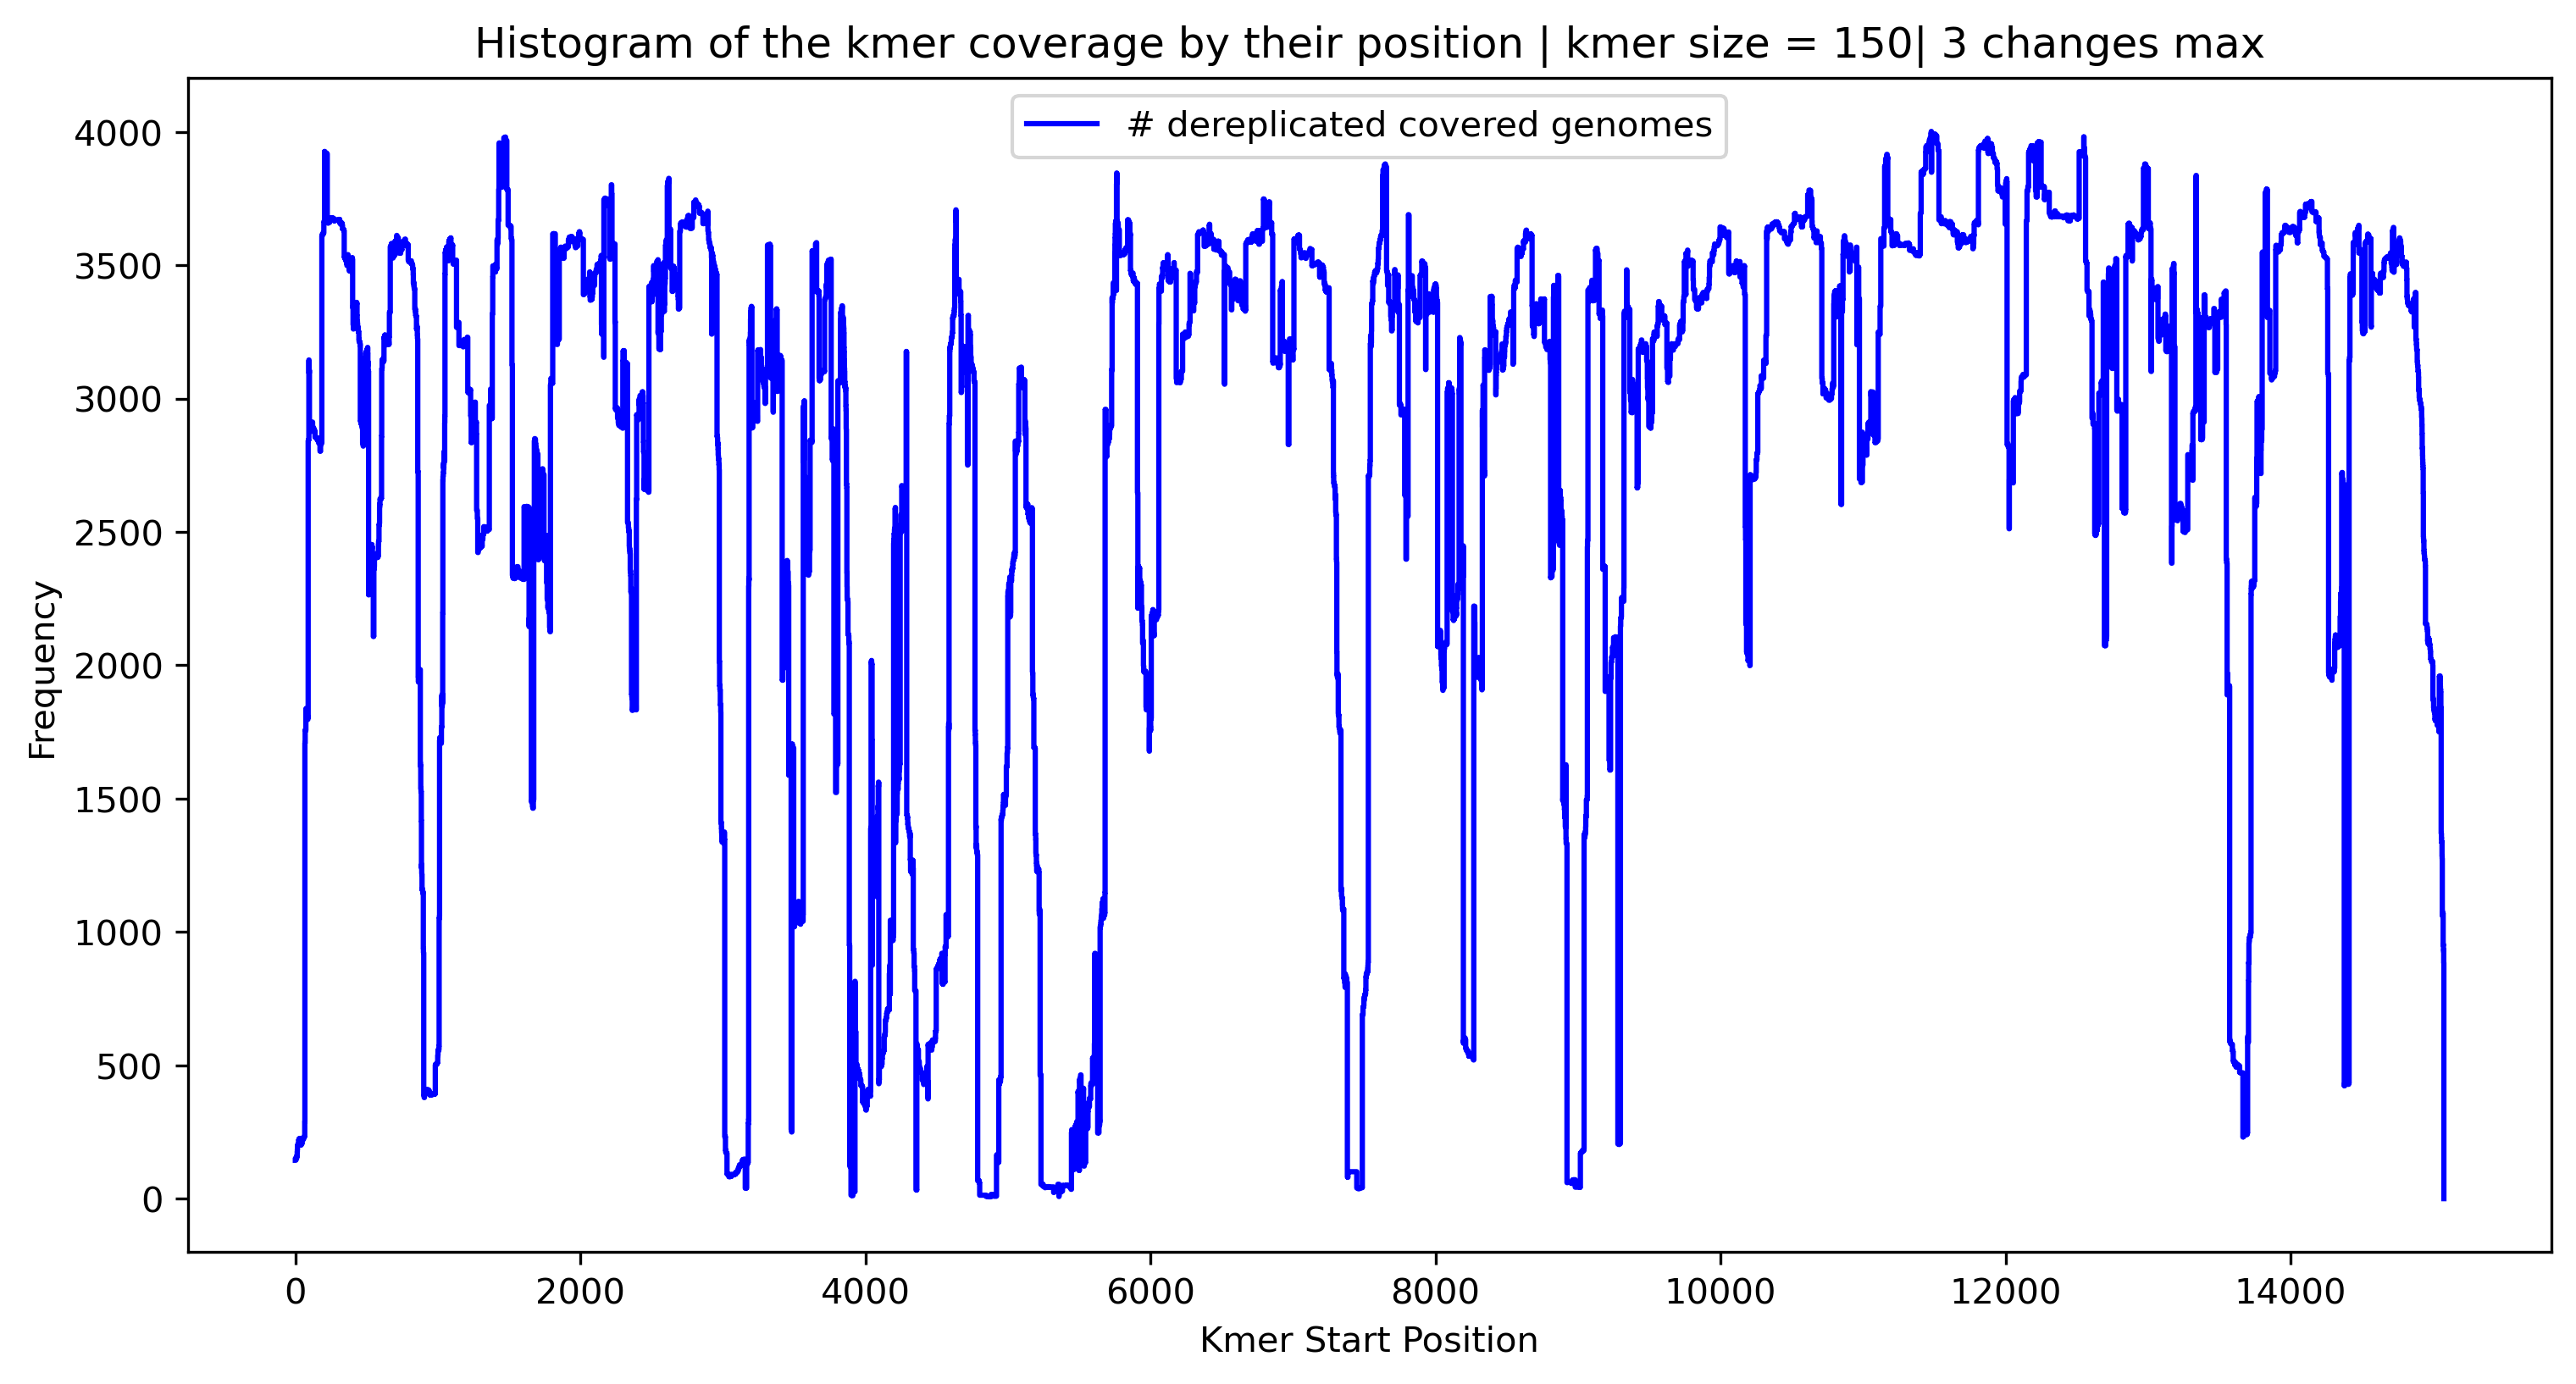

In [7]:
df3.columns = df3.columns.astype(int)
# plot_rel_cons(df,kmer_size=KMER_SIZE, threshold=KMER_SIZE-THRESHOLD)
plot_rel_cons(df3, kmer_size=KMER_SIZE, threshold=3)


In [ ]:
# This should be defined based on the plots you get
COVERAGE_RATIO = 0.5 #3500/ df3.shape[0]

# Crop DataFrame to L gene region and apply coverage threshold
# ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
# kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask, window_size=150)
ldf = crop_df(df3, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask3, window_size=KMER_SIZE)

Limiting DataFrame to gene region from position 8000 to 16000
Minimum coverage threshold set to 2041 based on coverage ratio 0.5
DataFrame cropped to 6320 columns with coverage above threshold.
Using 112 processes


In [10]:
print("hello")

hello


In [12]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")




df_kmers1, df_kmers2, df_samples = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=kmer1,
                                                kmer2=kmer2,
                                                drop_old_samples=False,
                                                kmer_size= 150,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 11506):
GTTATATCGAAGTTTCTATAGAAGAACTCCTGATTTCCTCACAGAGGCTATAGTTCACTCTGTGTTCATACTTAGTTATTATACAAACCATGATTTAAAAGATAAACTTCAAGATCTGTCAGATGATAGATTGAATAAGTTCTTAACATG
Kmer2 sequence (position 12980):
GACTATTTTCATAATACTTACATTTTAAGTACTAATTTAGCTGGACATTGGATTCTTATTATACAACTTATGAAAGATTCTAAGGGTATTTTTGAAAAAGATTGGGGAGAGGGATATATAACTGATCATATGTTCATTAATTTGAAAGTT
Read 4082 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (4082, 5)
df_samples shape after dropping NaN years: (4082, 5)
df_samples shape after dropping samples with non ATCG chars: (3992, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rsva_algo1/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rsva_algo1/kmers2_mutations.png


In [13]:
print(kmer1)
print(kmer2)

11506
12980


In [189]:
kk1 = 'ATACAACAAGCACTATAGCTAGTGGCATAATCATAGAGAAATATAATGTCAACAGTTTAACACGTGGTGAGAGAGGACCCACTAAACCATGGGTTGGTTCATCTACACAAGAGAAAAAGACAATGCCAGTTTATAATAGACAAGTTTTAA'
kk2 = 'TTGTTTATGAAAGTTTACCCTTTTATAAAGCAGAGAAAATAGTAAATCTTATATCCGGTACAAAATCTATAACTAACATACTGGAAAAGACTTCTGCCATAGACTTAACAGATATTGATAGAGCCACTGAGATGATGAGGAAAAACATAA'


In [190]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

In [191]:
k1_pos = find_kmer_position(df_ref, kk1, window_size=150)
print(k1_pos)

12225


In [192]:
k2_pos = find_kmer_position(df_ref, kk2, window_size=150)
print(k2_pos)

# calculate_kmer_coverage(ldf, DEREP_FASTA_ALN, mask3, k1_pos, k2_pos, window_size=150)/ldf.shape[0]

11901


In [193]:


# Extract kmer sequences
kmer1_seq = ref_seq[k1_pos:k1_pos+KMER_SIZE]
kmer2_seq = ref_seq[k2_pos:k2_pos+KMER_SIZE]

print(f"Kmer1 sequence (position {k1_pos}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {k2_pos}):\n{kmer2_seq}")




df_kmers1, df_kmers2, df_samples = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=k1_pos,
                                                kmer2=k2_pos,
                                                drop_old_samples=False,
                                                kmer_size= 150,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 12225):
ATACAACAAGCACTATAGCTAGTGGCATAATCATAGAGAAATATAATGTCAACAGTTTAACACGTGGTGAGAGAGGACCCACTAAACCATGGGTTGGTTCATCTACACAAGAGAAAAAGACAATGCCAGTTTATAATAGACAAGTTTTAA
Kmer2 sequence (position 11901):
TTGTTTATGAAAGTTTACCCTTTTATAAAGCAGAGAAAATAGTAAATCTTATATCCGGTACAAAATCTATAACTAACATACTGGAAAAGACTTCTGCCATAGACTTAACAGATATTGATAGAGCCACTGAGATGATGAGGAAAAACATAA
Read 4082 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (4082, 5)
df_samples shape after dropping NaN years: (4082, 5)
df_samples shape after dropping samples with non ATCG chars: (3989, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmers2_mutations.png


In [194]:
### After dereplication

import pandas as pd

def aggregate_kmer_by_year(df, kmer_n= 'kmer1'):
    """
    Aggregates the kmer1 column by year and returns a dataframe 
    with columns = (sequence, 1900, ..., 2025), 
    where each cell represents the frequency of that kmer1 for that year.
    """
    # 1. Count frequency of each (kmer1, year) pair
    df_count = df.groupby([kmer_n, "year"]).size().reset_index(name="frequency")
    
    # 2. Create a pivot table to widen the data
    pivot_df = df_count.pivot_table(
        index=kmer_n,
        columns="year",
        values="frequency",
        fill_value=0
    )
    
    # 3. Reindex columns to ensure we have columns from 1900 to 2025
    all_years = range(1900, 2026)
    pivot_df = pivot_df.reindex(columns=all_years, fill_value=0)
    
    # 4. Move `kmer1` from index to a column named 'sequence'
    pivot_df.reset_index(inplace=True)
    pivot_df.rename(columns={kmer_n: "sequence"}, inplace=True)

    return pivot_df

# Example usage:
# aggregated_df = aggregate_kmer_by_year(df_samples, )
# aggregated_df.head()


In [213]:
aggregated_df_kmer1 = aggregate_kmer_by_year(df_samples, kmer_n= 'kmer1')
aggregated_df_kmer1 = aggregated_df_kmer1.loc[:, aggregated_df_kmer1.sum(axis=0) != 0]

aggregated_df_kmer2 = aggregate_kmer_by_year(df_samples, kmer_n= 'kmer2')
aggregated_df_kmer2 = aggregated_df_kmer2.loc[:, aggregated_df_kmer2.sum(axis=0) != 0]



In [214]:
aggregated_df_kmer1.columns.name = None
aggregated_df_kmer2.columns.name = None

In [215]:
aggregated_df_kmer1.to_csv('/fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmer1_sequences_by_years_after_derep.csv')
aggregated_df_kmer2.to_csv('/fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmer2_sequences_by_years_after_derep.csv')


In [216]:
## Before Derep

In [217]:
import re

def extract_year(seq_id):
    """
    Extracts the year from the last part of the ID, 
    which may look like '2013-01-03' or just '2019'.
    Returns an integer year or None if not found.
    """
    # Get the part after the last '|'
    last_part = seq_id.split("|")[-1].strip()
    
    # Try matching a 4-digit year at the start
    match = re.match(r"^(\d{4})", last_part)
    if match:
        return int(match.group(1))
    return None


In [220]:
from collections import defaultdict

def parse_blocks(lines):
    """
    Parses lines to form blocks of data where each block starts with 'S'
    and continues through the following 'H' lines.
    If a line begins with 'C', we stop reading further lines.
    
    Yields a dict with:
      - 'group_id' (from the 'S' line)
      - 'size'
      - 'year_counts' (defaultdict(int)) mapping year → count
    """
    current_block = None
    
    for line in lines:
        parts = line.strip().split("\t")
        if not parts:
            continue
        
        rec_type = parts[0]  # One of 'S', 'H', or 'C'
        
        if rec_type == "S":
            # If there was a previous block, yield it before starting a new one
            if current_block:
                yield current_block
            
            # Start a new block
            seq_id = parts[8]  # 9th column is the sequence ID for 'S'
            year = extract_year(seq_id)
            
            year_dict = defaultdict(int)
            if year is not None:
                year_dict[year] += 1
            
            current_block = {
                "group_id": seq_id,
                "size": 1,
                "year_counts": year_dict
            }
        
        elif rec_type == "H" and current_block is not None:
            # Lines starting with 'H' belong to the current block
            seq_id = parts[8]
            year = extract_year(seq_id)
            if year is not None:
                current_block["year_counts"][year] += 1
            
            current_block["size"] += 1
        
        elif rec_type == "C":
            # We encountered 'C'; stop reading further.
            # First, if there's a current block, yield it
            if current_block:
                yield current_block
            break  # Stop altogether

    # After finishing the for-loop, if there's still a block, yield it
    else:
        # 'else' clause on a for-loop executes only if we never broke out
        if current_block:
            yield current_block


In [221]:
import pandas as pd

def build_dataframe_from_groups(groups):
    rows = []
    all_years = range(1900, 2026)  # 1900 through 2025
    
    for block in groups:
        group_id = block["group_id"]
        size = block["size"]
        year_counts = block["year_counts"]
        
        # Create the row dict
        row = {}
        # First column: group_id;size=X
        row["ID"] = f"{group_id};size={size}"
        
        # Add each year from 1900..2025
        for y in all_years:
            row[y] = year_counts.get(y, 0)
        
        rows.append(row)
    
    # Convert to DataFrame
    df = pd.DataFrame(rows)
    # We probably want "ID" as the first column
    # which it should be by default. If not, reorder:
    columns_order = ["ID"] + list(all_years)
    df = df[columns_order]
    
    return df


In [222]:
def create_dataframe(file_path):
    # 1. Read the file
    with open(file_path, "r") as f:
        lines = f.readlines()
    
    # 2. Build groups
    blocks = list(parse_blocks(lines))
    
    # 3. Convert to final DataFrame
    df_result = build_dataframe_from_groups(blocks)
    return df_result



In [223]:
df_final = create_dataframe("/fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/clusters.uc")

In [225]:
df_final = df_final.loc[:, df_final.sum(axis=0) != 0]
df_final.to_csv("/fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/mapping_samples_to_years.csv", index=False)

In [226]:
df_merged = pd.merge(df_samples, df_final, left_on='ID', right_on='ID', how='inner')
df_merged.drop(columns=['year'], inplace=True)



In [227]:
df_merged_kmer1 = df_merged.drop(columns=(["ID", "Sequence", "kmer2"]))
df_merged_kmer2 = df_merged.drop(columns=(["ID", "Sequence", "kmer1"]))

In [228]:
df_merged_kmer1 = df_merged_kmer1.groupby("kmer1").sum()
df_merged_kmer1 = df_merged_kmer1.loc[:, df_merged_kmer1.sum(axis=0) != 0]

df_merged_kmer2 = df_merged_kmer2.groupby("kmer2").sum()
df_merged_kmer2 = df_merged_kmer2.loc[:, df_merged_kmer2.sum(axis=0) != 0]


In [229]:
df_merged_kmer1.to_csv('/fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmer1_sequences_by_years_before_derep.csv')
df_merged_kmer2.to_csv('/fast/AG_Ohler/ekarimi/projects/vicon/results/rsva/kmer2_sequences_by_years_before_derep.csv')
